# $\color{blue}{\text{Tasks:}}$

$\color{green}{\text{1. Storytelling of Covid-19 deaths in USA by graph}}$ 

$\color{green}{\text{2. Impact of Covid-19 during the year}}$

$\color{green}{\text{3. No. of deaths vs Months}}$

# Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataSet

$\color{green}{\text{1. Month column represents the Month in Year}}$ 

$\color{green}{\text{2. New_deaths column: represents the avg death each month}}$ 

$\color{green}{\text{3. Data Range (Jan 01, 2020 till Dec 15, 2020)}}$ 

# Loading Data

In [5]:
avg_death = pd.read_csv("avg_deaths.csv")
avg_death                                   #data frame

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [6]:
#adding days column e.g Jan has 31 days, Feb has 29 days in 2020

avg_death["Days"] = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 15] 

avg_death

,Month,New_deaths,Days
0,1,0,31
1,2,0,29
2,3,77,31
3,4,1844,30
4,5,1448,31
5,6,785,30
6,7,769,31
7,8,1020,31
8,9,739,30
9,10,751,31


In [7]:
#Now multuiplying both columns to get Monthly deaths in USA

avg_death["Deaths_Month"] = avg_death["New_deaths"] * avg_death["Days"]
avg_death

,Month,New_deaths,Days,Deaths_Month
0,1,0,31,0
1,2,0,29,0
2,3,77,31,2387
3,4,1844,30,55320
4,5,1448,31,44888
5,6,785,30,23550
6,7,769,31,23839
7,8,1020,31,31620
8,9,739,30,22170
9,10,751,31,23281


In [8]:
#Cumulative sum of deaths 

avg_death["Cum_Deaths"] = avg_death["Deaths_Month"].cumsum()
avg_death

,Month,New_deaths,Days,Deaths_Month,Cum_Deaths
0,1,0,31,0,0
1,2,0,29,0,0
2,3,77,31,2387,2387
3,4,1844,30,55320,57707
4,5,1448,31,44888,102595
5,6,785,30,23550,126145
6,7,769,31,23839,149984
7,8,1020,31,31620,181604
8,9,739,30,22170,203774
9,10,751,31,23281,227055


In [15]:
#For proportion of deaths by specified period

l = [2387, 126145, 227055, 297510]

prop = []
for i in l:
    prop.append(round(i/l[-1],2))
prop

[0.01, 0.42, 0.76, 1.0]

In [16]:
# For graphical representation

xmin = 0.5

xmax = []

for i in prop:
    xmax.append(0.5+i*0.3)
xmax

[0.503, 0.626, 0.728, 0.8]

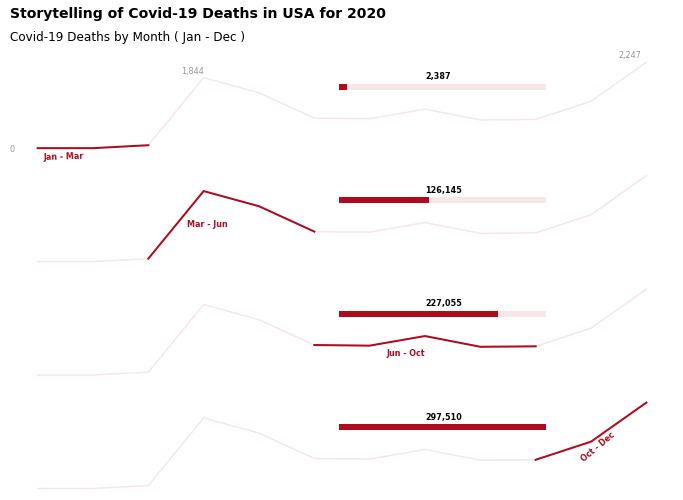

In [19]:
#Creating 04 subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8))

ax1, ax2, ax3, ax4 = ax.flatten()
axes = [ax1, ax2, ax3, ax4]

#Graphical representation of same line chart in 04 subplots with differentiation.

for ax, xm, d in zip(axes, xmax, l):
    ax.plot(avg_death["Month"], avg_death["New_deaths"], color = "#af0b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom=0, left=False)
    ax.axhline(1600, xmin = 0.5, xmax = 0.8, color = "#af0b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(1600, xmin = 0.5, xmax = xm, color = "#af0b1e", linewidth = 6)
    ax.text(x = 8, y = 1800, s = format(d, ","), weight = "bold", size=8)
    for spine in ax.spines.values():
        spine.set_visible(False)
        
ax1.plot(avg_death["Month"][:3], avg_death["New_deaths"][:3], color = "#af0b1e", linewidth = 2)
ax2.plot(avg_death["Month"][2:6], avg_death["New_deaths"][2:6], color = "#af0b1e", linewidth = 2)
ax3.plot(avg_death.loc[5:9,"Month"], avg_death["New_deaths"][5:10], color = "#af0b1e", linewidth = 2)
ax4.plot(avg_death.loc[9:11,"Month"], avg_death["New_deaths"][9:12], color = "#af0b1e", linewidth = 2)

ax1.text(x = 0.5, y = -100, s = '0', alpha = 0.4, size=8)
ax1.text(x = 3.6, y = 1950, s = format(1844, ','), alpha = 0.4, size=8)
ax1.text(x = 11.5, y = 2350, s = format(2247, ','), alpha = 0.4, size=8)

ax1.text(x = 1.1, y = -300, s = 'Jan - Mar', weight = "bold",color = "#af0b1e", size=8, rotation = 1.7)
ax2.text(x = 3.7, y = 900, s = 'Mar - Jun', weight = "bold",color = "#af0b1e", size=8)
ax3.text(x = 7.3, y = 500, s = 'Jun - Oct', weight = "bold",color = "#af0b1e", size=8)
ax4.text(x = 10.8, y = 700, s = 'Oct - Dec', weight = "bold",color = "#af0b1e", size=8, rotation = 40)

ax1.text(x = 0.5, y = 3400, s = 'Storytelling of Covid-19 Deaths in USA for 2020', size=14, weight = "bold")
ax1.text(x = 0.5, y = 2800, s = 'Covid-19 Deaths by Month ( Jan - Dec )', size=12)

plt.show()